In [572]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Importing libraries and datasets

In [573]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

%matplotlib inline

In [574]:
df_us_cities_zips = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/census_code_mappers/us_cities_zips.csv')
df_income_by_zip = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/ACSST5Y2021/ACSST5Y2021.S1901-Data.csv')
df_green_zip = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/greenspace_data/percent_cover_zipcode.csv')
df_green_zip['ZIP'] = 'ZCTA5 ' + df_green_zip['ZIP'].astype(str)
df_income_by_zip

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_012E,S1901_C01_013E,S1901_C02_001E,S1901_C02_012E,S1901_C02_013E,S1901_C03_001E,S1901_C03_012E,S1901_C04_001E,S1901_C04_012E,S1901_C04_013E
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median inco...,Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income ...,Estimate!!Nonfamily households!!Mean income (d...
1,860Z200US00601,ZCTA5 00601,5397,15292,19468,3576,16283,21779,2170,19060,1821,9386,13044
2,860Z200US00602,ZCTA5 00602,12858,18716,27778,8922,23199,32073,5715,26600,3936,11242,16419
3,860Z200US00603,ZCTA5 00603,19295,16789,29102,12777,21537,34523,6925,35043,6518,10639,16824
4,860Z200US00606,ZCTA5 00606,1968,18835,22236,1299,21044,24294,584,25455,669,15849,16312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33770,860Z200US99923,ZCTA5 99923,13,-,N,0,-,-,0,-,13,-,N
33771,860Z200US99925,ZCTA5 99925,345,70625,83366,217,79375,88552,149,95417,128,23958,58940
33772,860Z200US99926,ZCTA5 99926,457,58229,71467,349,80625,79477,238,98333,108,31250,41015
33773,860Z200US99927,ZCTA5 99927,11,-,N,0,-,-,0,-,11,-,N


In [575]:
header_row = df_income_by_zip.iloc[0, :].to_list()
header_row

['Geography',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Families!!Total',
 'Estimate!!Families!!Median income (dollars)',
 'Estimate!!Families!!Mean income (dollars)',
 'Estimate!!Married-couple families!!Total',
 'Estimate!!Married-couple families!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Total',
 'Estimate!!Nonfamily households!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Mean income (dollars)']

In [576]:
header_row[2] = header_row[2][0:-1]
df_income_by_zip.columns = header_row
df_income_by_zip = df_income_by_zip.iloc[1:, :]
df_income_by_zip = df_income_by_zip.rename(columns={'Geographic Area Name': 'ZIP'})
df_income_by_zip = df_income_by_zip.replace(('-', '**', '****', 'N', 'median+', 'median-', '(X)'), np.nan)
df_income_by_zip = df_income_by_zip.replace('250,000+', 250000)
df_income_by_zip

,Geography,ZIP,Estimate!!Households!!Tota,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars)
1,860Z200US00601,ZCTA5 00601,5397,15292,19468,3576,16283,21779,2170,19060,1821,9386,13044
2,860Z200US00602,ZCTA5 00602,12858,18716,27778,8922,23199,32073,5715,26600,3936,11242,16419
3,860Z200US00603,ZCTA5 00603,19295,16789,29102,12777,21537,34523,6925,35043,6518,10639,16824
4,860Z200US00606,ZCTA5 00606,1968,18835,22236,1299,21044,24294,584,25455,669,15849,16312
5,860Z200US00610,ZCTA5 00610,8934,21239,29555,6041,25097,34188,3757,28653,2893,12832,16756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33770,860Z200US99923,ZCTA5 99923,13,NaN,NaN,0,NaN,NaN,0,NaN,13,NaN,NaN
33771,860Z200US99925,ZCTA5 99925,345,70625,83366,217,79375,88552,149,95417,128,23958,58940
33772,860Z200US99926,ZCTA5 99926,457,58229,71467,349,80625,79477,238,98333,108,31250,41015
33773,860Z200US99927,ZCTA5 99927,11,NaN,NaN,0,NaN,NaN,0,NaN,11,NaN,NaN


Sorting data such that only chosen city zip codes are there. Then removing empty columns and columns with only (X) values.

In [577]:
city_zip_codes = []
df_city_zip = df_us_cities_zips.loc[df_us_cities_zips['city'] == 'Portland']
for zc in df_city_zip['zip_code']:
    zc = 'ZCTA5 ' + str(zc)
    city_zip_codes.append(zc)
df_city_income_zip = df_income_by_zip.loc[df_income_by_zip['ZIP'].isin(city_zip_codes), :]

df_city_income_zip = df_city_income_zip.dropna(axis=0)

df_city_income_zip

,Geography,ZIP,Estimate!!Households!!Tota,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars)
4310,860Z200US14769,ZCTA5 14769,333,54917,64390,201,64205,73113,163,95027,132,53389,49953
5811,860Z200US18351,ZCTA5 18351,175,58068,60265,127,58125,60929,95,85144,48,47143,52338
12230,860Z200US37148,ZCTA5 37148,8820,62927,70907,6542,71010,79747,4834,80733,2278,28649,39124
15798,860Z200US47371,ZCTA5 47371,4840,51630,72185,2982,70769,90072,2155,82204,1858,34238,39211
16516,860Z200US48875,ZCTA5 48875,4117,83479,91660,3142,91694,101625,2577,99875,975,44405,50225
20175,860Z200US58274,ZCTA5 58274,429,70375,84312,314,84167,100444,253,103843,115,24028,40206
22941,860Z200US65067,ZCTA5 65067,176,49583,58912,107,67875,69062,87,90156,69,36250,32857
27755,860Z200US78374,ZCTA5 78374,6811,82124,103390,5105,88560,110554,3722,116667,1706,44048,75162
32600,860Z200US97201,ZCTA5 97201,9138,59811,104494,2371,149321,202582,2031,159009,6767,44064,69926
32601,860Z200US97202,ZCTA5 97202,18265,87266,116030,9435,121042,150271,7611,141464,8830,58727,77460


Sorting green cover data by zip code

In [578]:
df_city_cover_zip = df_green_zip.loc[df_green_zip['ZIP'].isin(city_zip_codes), :]
df_city_cover_zip


,ZIP,pct_park
3533,ZCTA5 65067,0.014
9691,ZCTA5 48875,3.350
11902,ZCTA5 45770,9.702
12658,ZCTA5 6480,26.422
12932,ZCTA5 71663,0.000
14226,ZCTA5 4101,9.037
14227,ZCTA5 4102,1.792
14228,ZCTA5 4103,3.103
14233,ZCTA5 4109,0.225
14299,ZCTA5 97201,23.537


Merging percentage cover to income data

In [579]:
df_cityandcover_zip = pd.merge(df_city_income_zip, df_city_cover_zip[['ZIP', 'pct_park']], on='ZIP')

Doing a scatterplot to check for correlation

/var/folders/md/_w6bxcps70gc_gzhk5rkxtw00000gn/T/ipykernel_64859/857613977.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cityandcover_zip.iloc[:, 2:] = df_cityandcover_zip.iloc[:, 2:].astype(int)


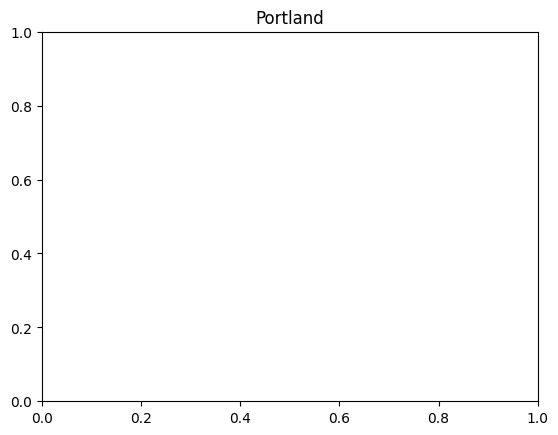

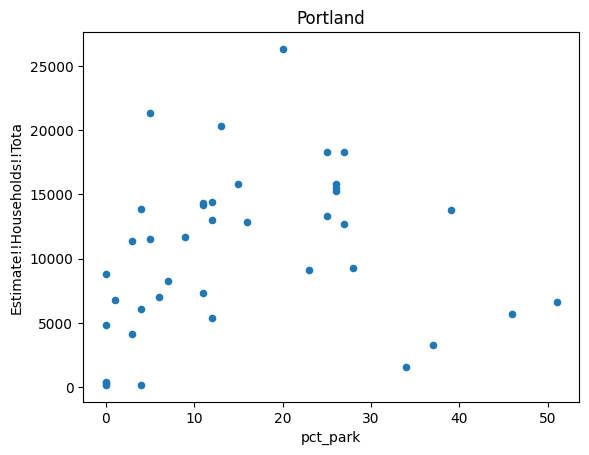

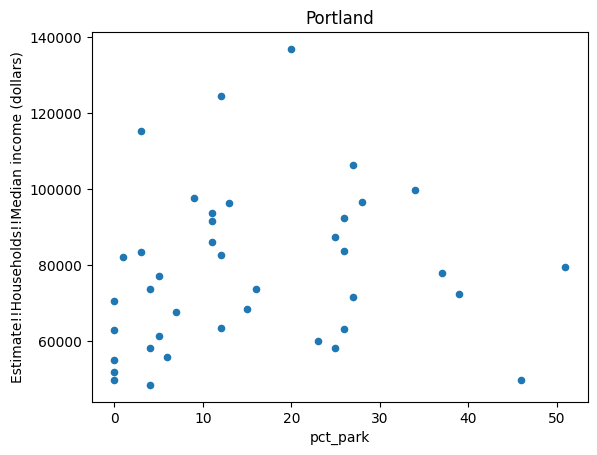

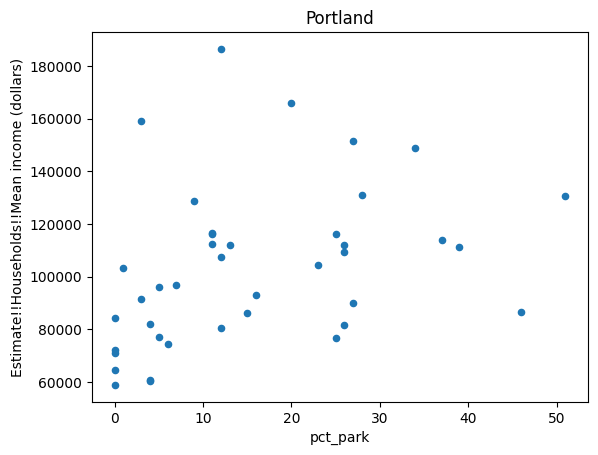

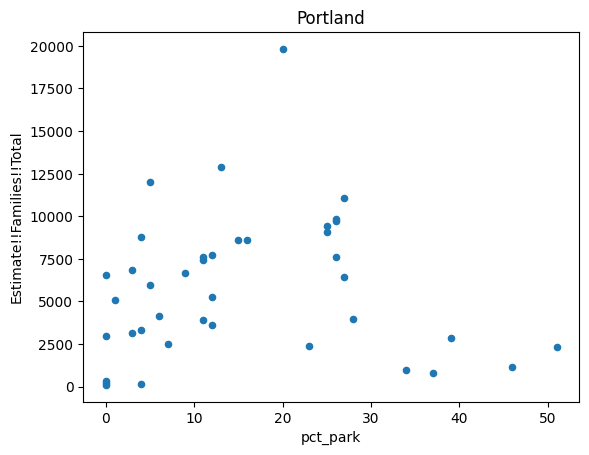

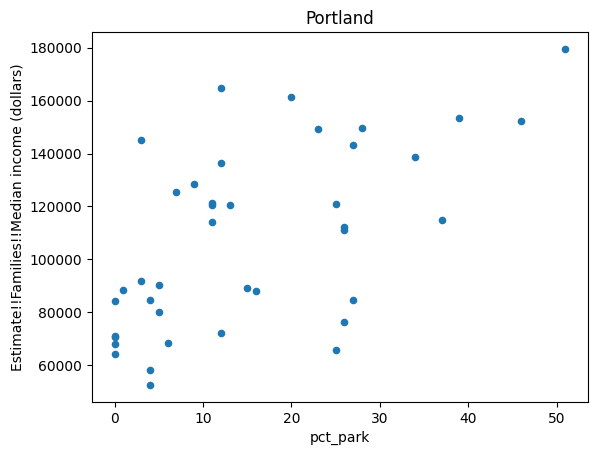

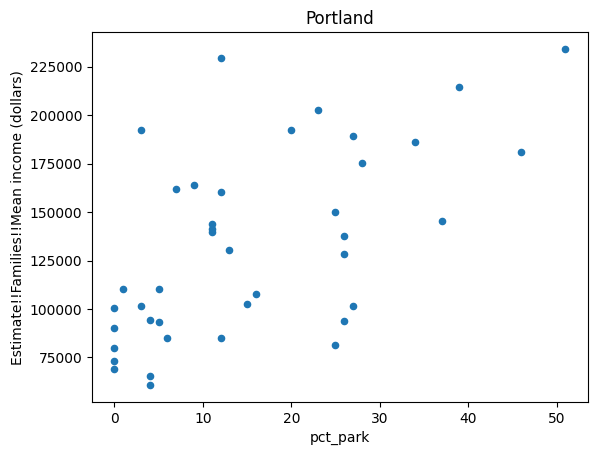

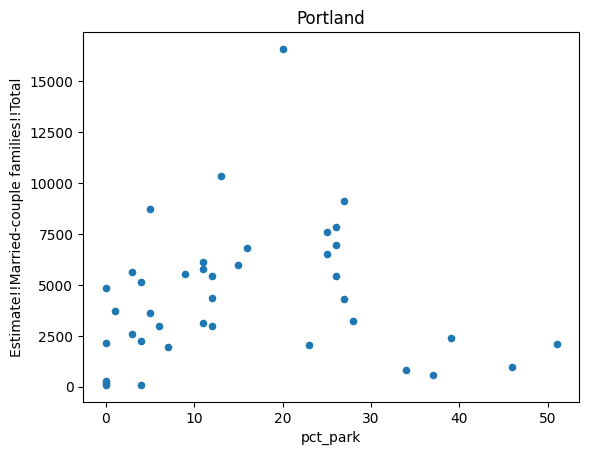

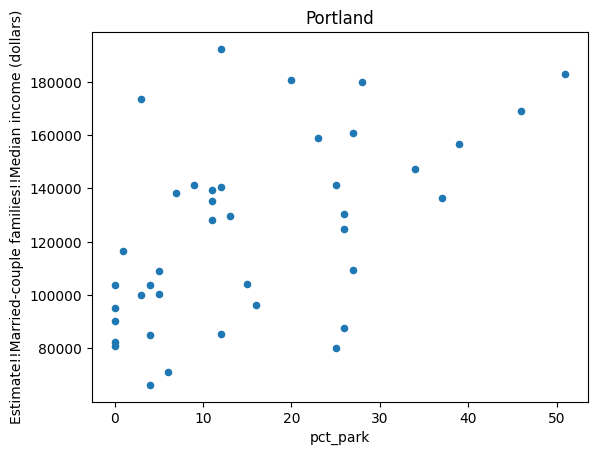

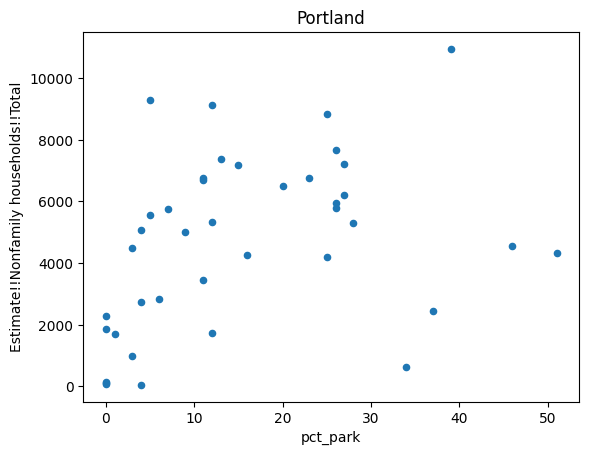

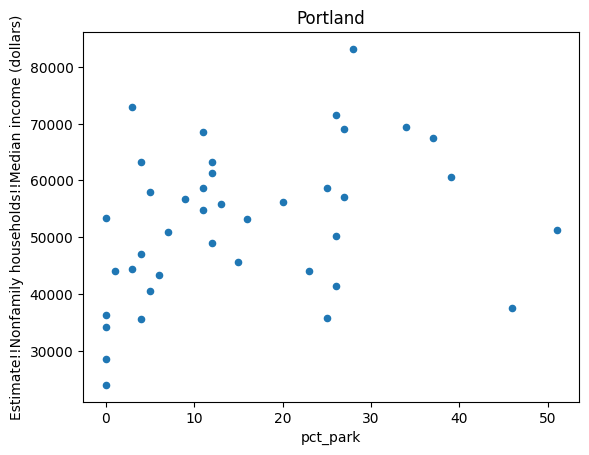

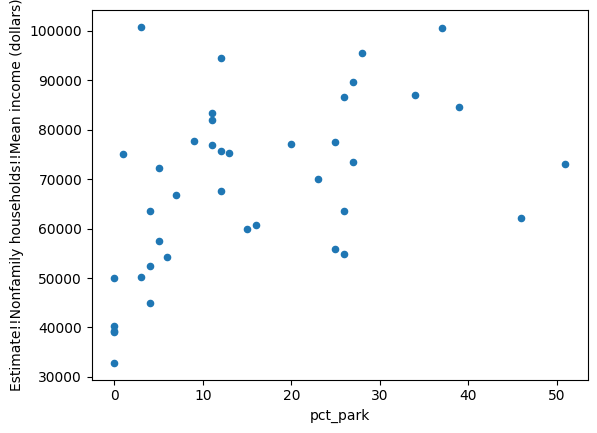

In [581]:
from scipy.stats import linregress

df_cityandcover_zip.iloc[:, 2:] = df_cityandcover_zip.iloc[:, 2:].astype(int)
df_cityandcover_zip['pct_park'] = df_cityandcover_zip['pct_park'].astype(float)

for col in df_cityandcover_zip.columns[2:13]:
    plt.title('Portland')
    df_cityandcover_zip.plot.scatter(x='pct_park', y=col)
